In [7]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [8]:
boston = datasets.load_boston()
y = boston.target

In [9]:
x = boston.data

new_x = x+x+x
new_x

y = boston.target
y = np.array(np.floor(y),'int64')

new_y = np.repeat(y, 2)

In [10]:
y = np.array(np.floor(y),'int64')
from collections import Counter

cnter= Counter(new_y)
cnter

Counter({24: 50,
         21: 62,
         34: 10,
         33: 18,
         36: 12,
         28: 20,
         22: 70,
         27: 18,
         16: 32,
         18: 50,
         15: 32,
         20: 72,
         19: 74,
         23: 74,
         17: 44,
         13: 48,
         14: 36,
         12: 18,
         30: 14,
         26: 16,
         25: 22,
         35: 8,
         31: 16,
         38: 2,
         43: 6,
         11: 18,
         41: 4,
         50: 32,
         29: 20,
         37: 10,
         39: 2,
         32: 14,
         42: 4,
         48: 6,
         44: 4,
         46: 4,
         45: 2,
         10: 20,
         8: 20,
         7: 14,
         9: 6,
         5: 6,
         6: 2})

In [11]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

iris_results = {}
digits_results = {}
boston_results = {}

In [12]:
from sklearn.impute import SimpleImputer as Imputer
iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()
datasets = [iris, digits, boston]
ds_names = ['iris', 'digits', 'boston']

for ds_name, ds in zip(ds_names, datasets):
    X, y = ds.data, ds.target
    y = np.array(np.floor(y),'int64')
    if(ds_name == 'boston'):
      X = np.repeat(X, 3,axis=0)
      y=np.repeat(y, 3)
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    
    for name, clf in zip(names, classifiers):
      score=0
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)
      if ds_name=='iris':
            iris_results[name]=score
      elif ds_name=='digits':
        digits_results[name]=score
      else:
        boston_results[name]=score


C:\Users\SALONI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SALONI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SALONI\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\SALONI\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:446: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\SALONI\an

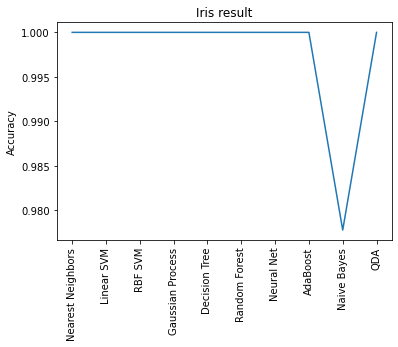

In [13]:
acc = []
for key in names:
    acc.append(iris_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.title("Iris result")
plt.xticks(x, names, rotation=90)
plt.ylabel('Accuracy')
plt.show()

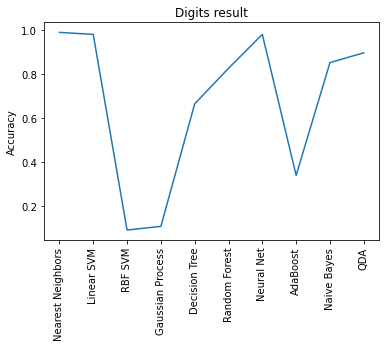

In [14]:
acc = []
for key in names:
    acc.append(digits_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.title("Digits result")
plt.xticks(x, names, rotation=90)
plt.ylabel('Accuracy')
plt.show()


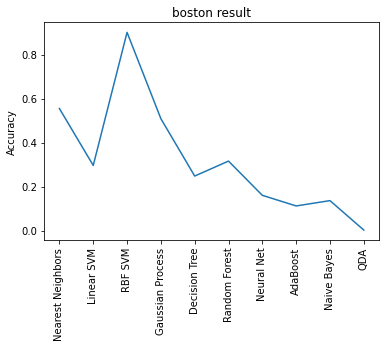

In [15]:
acc = []
for key in names:
    acc.append(boston_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.title("boston result")
plt.xticks(x, names, rotation=90)
plt.ylabel('Accuracy')
plt.show()